### 🏠 Housing Price Inflation Hypothesis Test

In this analysis, I aimed to statistically validate the claim that **housing price inflation exceeds 10%**.  
To test this hypothesis, I collected a random sample of **100 housing price inflation percentages** and performed a **one-tailed (right-tailed) Z-test**.

#### **Hypotheses**
- **Null Hypothesis (H₀):** μ = 10%  → Housing inflation is 10%  
- **Alternate Hypothesis (H₁):** μ > 10% → Housing inflation is greater than 10%

#### **Approach**
Since the **population standard deviation (σ)** is known, a **Z-test** was appropriate.  
I also validated our result using the **p-value method** to ensure consistency.

#### **Results**
- **Z-Score for my sample:** 2.50  which is at right side of tail
- **Critical Z-Value (α = 0.05):** 1.645  
- **P-Value:** 0.006  

#### **Conclusion**
Because the **Z-score > Z-critical** and **p-value < 0.05**,  
we **reject the null hypothesis** and conclude that **housing inflation is statistically higher than 10%**.

In simpler terms, this test provides **strong evidence** that housing prices have increased **beyond the reported 10% mark**, supporting the alternate hypothesis.

In [2]:
import pandas as pd
import numpy as np

In [4]:

from google.colab import files
uploaded = files.upload()

Saving house_price_increase.csv to house_price_increase.csv


In [5]:
df=pd.read_csv('house_price_increase.csv')

### Null Hypothesis: Housing inflation is 10%
### Alternate Hypothesis: Housing inflation is > 10%


For this test, I have collected a sample of 100 home prices inflation numbers. I will load that in pandas dataframe
This is a truly random sample of 100 home inflation percentage selected

In [6]:
df.head()

,house_id,price_increase_pct
0,NJ001,12.7
1,NJ002,11.3
2,NJ003,11.9
3,NJ004,13.2
4,NJ005,12.8


In [7]:
df.shape  # 100 rows or sample

(100, 2)

In [8]:
population_mean = 10  # hard coding poulation mean  which is status quo
population_std_dev = 4 # Hard coding population std dev

In [9]:
# sample mean from my 100 samples turns out to be 11 which is greater than 10

sample_mean = df.price_increase_pct.mean()
sample_mean

np.float64(11.0)

In [10]:
sample_size = df.shape[0]
sample_size

100

In [11]:
standard_error = population_std_dev/np.sqrt(sample_size)  # calculation standard error or standard deviation
#of sampling distribution of sample mean and my n  is already >30 so it lies with the standard normal curve
standard_error

np.float64(0.4)

In [25]:
z_score = (sample_mean-population_mean)/standard_error
z_score

np.float64(2.5)

#I am defining  significance level (alpha) to be 5%.  # 1- confidence level

# so my confidence level is 95

In [26]:
alpha = 0.05 # alpha is  significance level

### Z Test Using Rejection Region

In [27]:
from scipy import stats

z_critical=stats.norm.ppf(1-alpha)  #95 percent

In [28]:
z_critical

np.float64(1.6448536269514722)

In [29]:
z_score, z_critical

(np.float64(2.5), np.float64(1.6448536269514722))

Since my  z_score > z_critical, we will reject the NULL hypothesis. This means the alternate hypothesis becomes true which means the inflation is indeed higher than 10%

### Z Test Using p-Value

In [31]:
from scipy import stats

stats.norm.cdf(z_score)

np.float64(0.9937903346742238)

In [42]:
p_value = 1 - stats.norm.cdf(z_score) # getting p value from z score
p_value

np.float64(0.006209665325776159)

Since P value (0.006) is less than alpha (i.e. significance level -> 0.05), we reject the null hypothesis. This means there is statistically significant evidence to support the claim that the inflation rate in house prices is higher than the reported 10%.

In [45]:
if p_value < alpha:
    print("Reject Null Hypothesis → Susnata is correct ,Housing inflation is significantly > 10%.")
else:
    print("Fail to Reject Null Hypothesis → No significant evidence inflation > 10%.")

Reject Null Hypothesis → Susnata is correct ,Housing inflation is significantly > 10%.


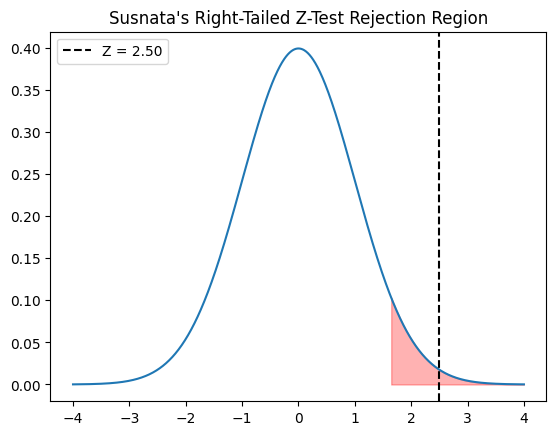

In [44]:
import matplotlib.pyplot as plt
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x)
plt.plot(x, y)
plt.fill_between(x, y, where=(x>z_critical), color='red', alpha=0.3)
plt.axvline(z_score, color='black', linestyle='--', label=f'Z = {z_score:.2f}')
plt.legend()
plt.title("Susnata's Right-Tailed Z-Test Rejection Region")
plt.show()